In [54]:
import pandas as pd
import numpy as np


In [55]:
small = pd.read_csv('pc1_small_train_data_v1.csv')
medium = pd.read_csv('pc1_medium_train_data_v1.csv')
large = pd.read_csv('pc1_large_train_data_v1.csv')
train_s = small.drop(columns=['price'])
train_m = medium.drop(columns=['price'])
train_l = large.drop(columns=['price'])
train_s_y = small['price']
train_m_y = medium['price']
train_l_y = large['price']
test = pd.read_csv('pc1_test_without_response_variable_data_v1.csv')
test = test.drop(columns=['price'])


In [56]:
train_s.describe()

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,23.563467,2545.056667,31.186600,205.702933,59647.691233,2015.822067
std,6.174699,973.024044,6.187675,64.686119,36816.818992,2.990157
min,9.000000,700.000000,10.000000,78.000000,10003.000000,1984.000000
25%,19.000000,2000.000000,27.000000,160.000000,31954.000000,2014.000000
50%,23.000000,2400.000000,31.000000,182.000000,47873.500000,2017.000000
75%,27.000000,3000.000000,36.000000,250.000000,81717.000000,2018.000000
max,81.000000,7400.000000,86.000000,555.000000,388395.000000,2020.000000


In [57]:
train_m.describe()

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year
count,50000.00000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,17.65736,3967.606000,24.024440,338.383760,3.290581e+04,2017.686580
std,3.71604,1274.230945,4.106772,68.641679,2.635795e+04,1.782967
min,8.00000,700.000000,12.000000,95.000000,1.000000e+04,1984.000000
25%,16.00000,3000.000000,22.000000,285.000000,1.989100e+04,2017.000000
50%,17.00000,3600.000000,23.000000,340.000000,2.941000e+04,2018.000000
75%,19.00000,5300.000000,26.000000,385.000000,4.016325e+04,2019.000000
max,70.00000,8400.000000,75.000000,797.000000,4.290461e+06,2021.000000


In [58]:
train_l.describe()

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000
mean,17.275780,4137.848000,23.434410,356.939770,3.059939e+04,2017.856140
std,3.814442,1337.606452,4.097285,71.229815,2.241080e+04,1.898526
min,8.000000,700.000000,12.000000,82.000000,1.000000e+04,1984.000000
25%,15.000000,3000.000000,21.000000,300.000000,1.835975e+04,2017.000000
50%,17.000000,3600.000000,23.000000,360.000000,2.751700e+04,2018.000000
75%,19.000000,5300.000000,25.000000,395.000000,3.807825e+04,2019.000000
max,74.000000,8400.000000,75.000000,797.000000,4.290461e+06,2021.000000


In [59]:
test.describe()

,city_fuel_economy,engine_displacement,highway_fuel_economy,horsepower,mileage,year
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,23.586900,2545.595000,31.214400,206.151250,59219.647300,2015.868350
std,6.288181,975.577359,6.260215,64.811139,36322.410902,2.902902
min,9.000000,700.000000,12.000000,78.000000,10000.000000,1984.000000
25%,19.000000,2000.000000,27.000000,160.000000,31973.250000,2014.000000
50%,24.000000,2400.000000,31.000000,184.000000,47374.000000,2017.000000
75%,27.000000,3200.000000,36.000000,252.000000,81420.250000,2018.000000
max,81.000000,8100.000000,86.000000,540.000000,302741.000000,2020.000000


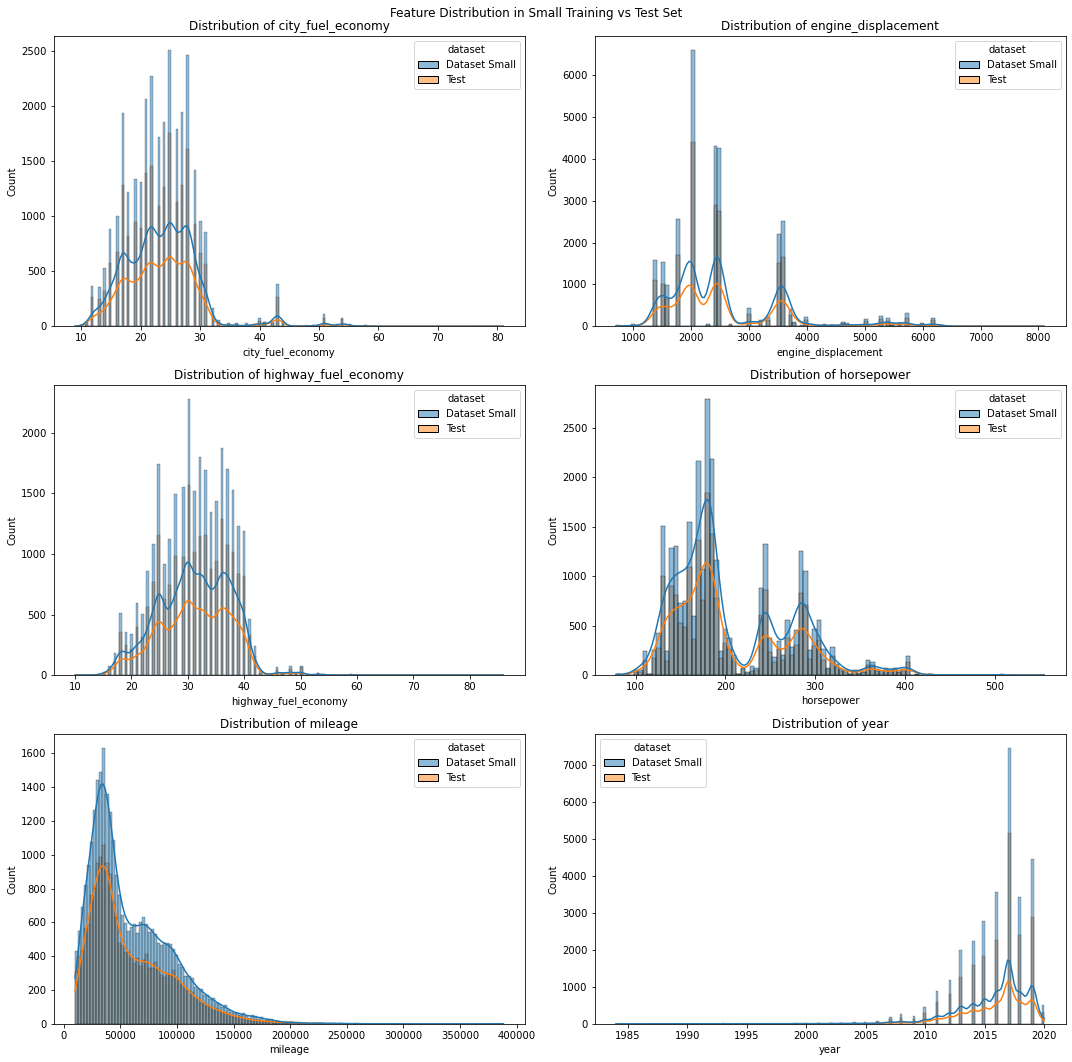

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combining datasets for comparison
train_s['dataset'] = 'Dataset Small'
train_m['dataset'] = 'Dataset Medium'
train_l['dataset'] = 'Dataset Large'
test['dataset'] = 'Test'

# Combining datasets for comparison
combined_s = pd.concat([train_s, test])
combined_s=combined_s.reset_index(drop=True)


# List of features to compare
features = ['city_fuel_economy', 'engine_displacement','highway_fuel_economy','horsepower','mileage','year']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Feature Distribution in Small Training vs Test Set')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plotting the distributions
for i, feature in enumerate(features):
    sns.histplot(data=combined_s, x=feature, hue='dataset', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

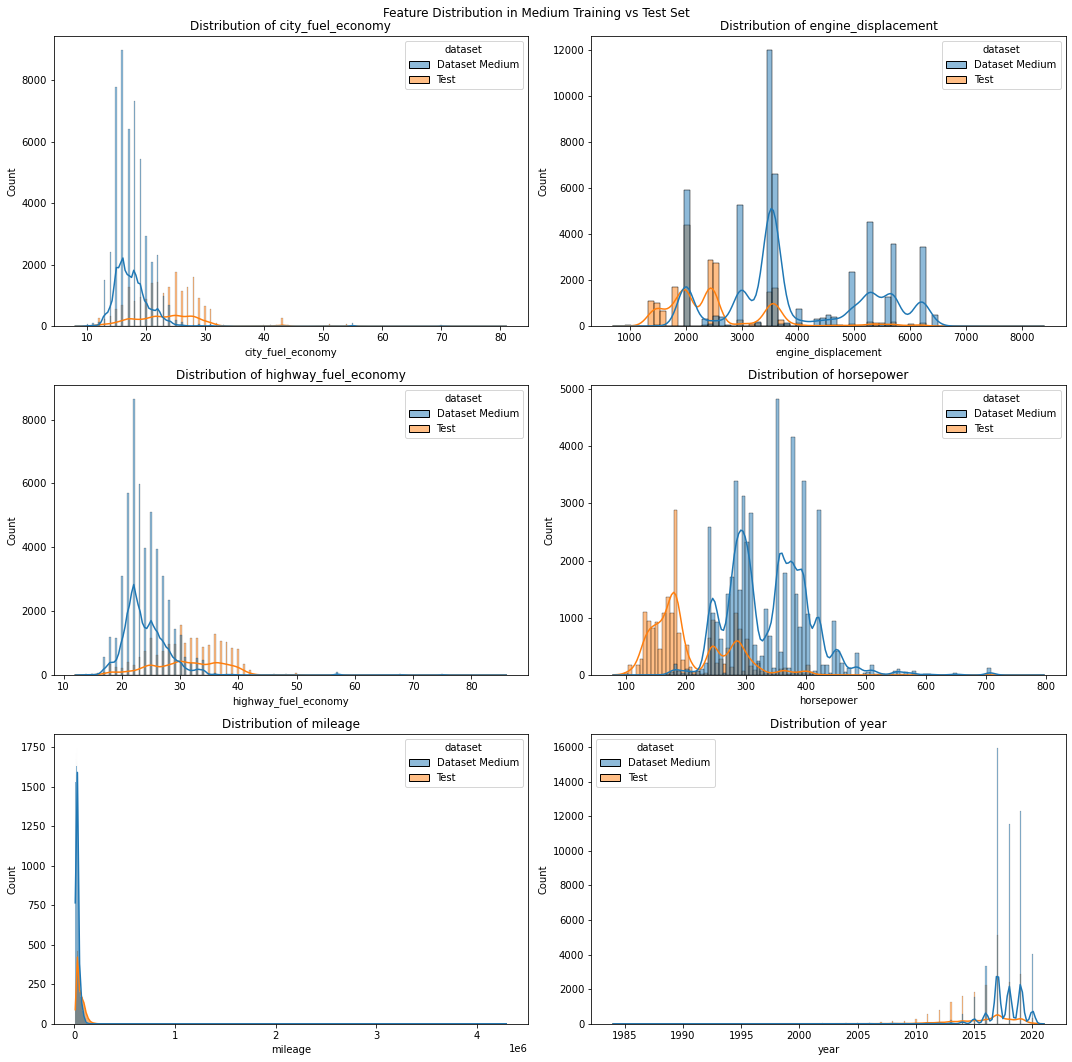

In [68]:
# Combining datasets for comparison
combined_m = pd.concat([train_m, test])
combined_m=combined_m.reset_index(drop=True)


fig1, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig1.suptitle('Feature Distribution in Medium Training vs Test Set')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plotting the distributions
for i, feature in enumerate(features):
    sns.histplot(data=combined_m, x=feature, hue='dataset', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

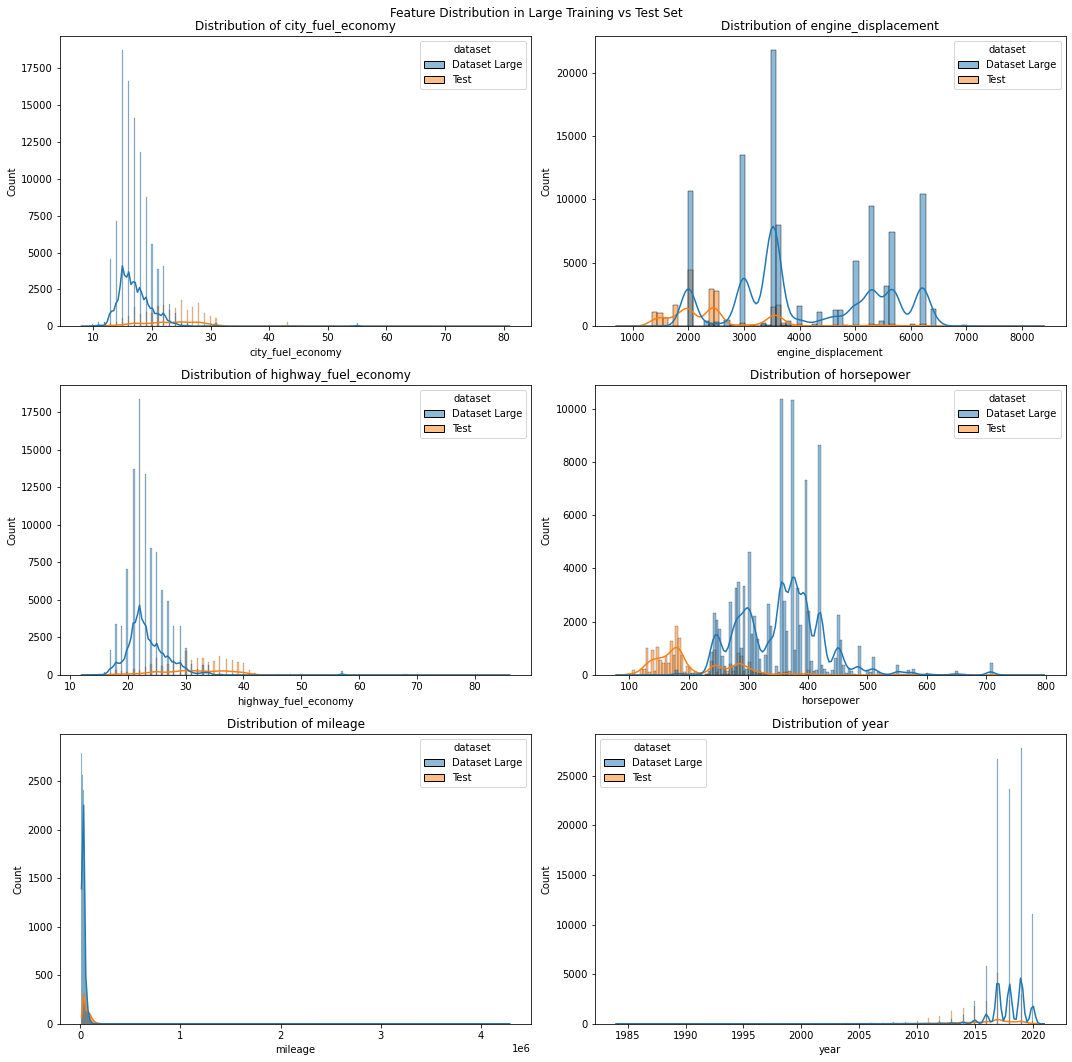

In [69]:
# Combining datasets for comparison
combined_l = pd.concat([train_l, test])
combined_l=combined_l.reset_index(drop=True)


fig2, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig2.suptitle('Feature Distribution in Large Training vs Test Set')

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plotting the distributions
for i, feature in enumerate(features):
    sns.histplot(data=combined_l, x=feature, hue='dataset', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [71]:
#Import the required package from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = small.drop(columns=['price'])
y = np.log(small['price'])

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize the models
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
decision_tree = DecisionTreeRegressor()

# Train the model
linear.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)

# Calculate performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print the performance metrics
mse_linear, r2_linear, mse_lasso, r2_lasso, mse_ridge, r2_ridge, mse_tree, r2_tree

(0.019398092970949268,
 0.4206801935075426,
 0.02382447197589611,
 0.2884873520540874,
 0.019398094936347265,
 0.42068013481136113,
 0.020089596681559522,
 0.40002858634082306)

In [102]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('price ~ city_fuel_economy*year+engine_displacement*year+highway_fuel_economy*year+horsepower*year+mileage*year+year',small).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     1921.
Date:                Sat, 22 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:54:15   Log-Likelihood:            -2.7174e+05
No. Observations:               30000   AIC:                         5.435e+05
Df Residuals:                   29988   BIC:                         5.436e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [109]:
small_train= small
small_train ['city_fuel_eco_y']=small_train['city_fuel_economy']*small_train['year']
small_train ['fuel_eco_y']=small_train['highway_fuel_economy']*small_train['year']
small_train ['engine_displacement_y']=small_train['engine_displacement']*small_train['year']
small_train ['m_y']=small_train['mileage']*small_train['year']
small_train ['m_y']=small_train['horsepower']*small_train['year']


In [110]:
#Import the required package from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the features and target variable
X = small_train.drop(columns=['price'])
y = np.log(small_train['price'])

# Split the data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize the models
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
decision_tree = DecisionTreeRegressor()

# Train the model
linear.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_tree = decision_tree.predict(X_test)

# Calculate performance metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print the performance metrics
mse_linear, r2_linear, mse_lasso, r2_lasso, mse_ridge, r2_ridge, mse_tree, r2_tree

C:\Users\Len\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.08332e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


(0.019022327740894185,
 0.43190233996740934,
 0.021888278896450113,
 0.34631133515369006,
 0.019040609259455034,
 0.4313563664116109,
 0.020431332510338397,
 0.3898227205118364)